<a href="https://colab.research.google.com/github/Yashrajput7232/Data_Science_django/blob/main/bank_loan__approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing  import MinMaxScaler
import warnings
from collections import Counter
from keras import Sequential
from keras.layers import Dense
from sklearn import svm, metrics
# import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/datsets/Loan-Approval-Prediction.csv')

df=pd.read_csv('/content/LoanApprovalPrediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df=df.dropna()
print(df.isnull().sum())
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])
df.head()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [ ]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status' ,axis=1)
dm_x=pd.get_dummies(pre_x)
print(dm_x)
dm_y=pre_y.map(dict(Y=1,N=0))

     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
1           1.0             4583             1508.0      128000   
2           0.0             3000                0.0       66000   
3           0.0             2583             2358.0      120000   
4           0.0             6000                0.0      141000   
5           2.0             5417             4196.0      267000   
..          ...              ...                ...         ...   
593         0.0             2900                0.0       71000   
594         3.0             4106                0.0       40000   
595         1.0             8072              240.0      253000   
596         2.0             7583                0.0      187000   
597         0.0             4583                0.0      133000   

     Loan_Amount_Term  Credit_History  Gender_Female  Gender_Male  Married_No  \
1               360.0             1.0              0            1           0   
2               360.0            

In [ ]:
# A_bxplt=plt.boxplot(df['ApplicantIncome'])
# B_bxplt=plt.boxplot(df['CoapplicantIncome'])
# A_bxplt,B_bxplt

In [ ]:
dm_x
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 505, dtype: int64

** here we are using SMOTE for balencing the imbalece data **
Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.


In [ ]:
from imblearn.over_sampling import SMOTE


smote=SMOTE(sampling_strategy='minority')
x1,y=smote.fit_resample(dm_x,dm_y)
sc=MinMaxScaler()
x=sc.fit_transform(x1)
x

array([[0.33333333, 0.05482993, 0.0445666 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03525046, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.03009276, 0.06968703, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1899019 , 0.11296228, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02828695, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10690167, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
x_train
# y_train
# x_test
# y_test
# print(x_train.shape,y_train.shape)

array([[0.        , 0.08719852, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.19504855, 0.0440569 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07235622, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.01802103, 0.03451903, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12497217, 0.00159663, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05588126, 0.06757019, ..., 1.        , 0.        ,
        0.        ]])

Naive_Bayes classification  by Gaussian model  
It uses condtional  proablity for classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)
pred_NB=NB.predict(x_test);
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_NB)
print(accuracy * 100)

84.50704225352112


In [ ]:
val=pd.DataFrame(pred_NB,columns=['Loan_Status'])
val=val.replace({1:"approved",0:"not approved"})

val

,Loan_Status
0,approved
1,not approved
2,approved
3,approved
4,approved
...,...
137,not approved
138,approved
139,approved
140,not approved


In [ ]:
pred_NB=NB.predict(x_test);
from sklearn.metrics import accuracy_score
accuracy_NB = accuracy_score(y_test, pred_NB)
print(accuracy * 100)

84.50704225352112


In [ ]:
pred_NB

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
cm_NB=confusion_matrix(y_test,pred_NB)
cm_NB

array([[47, 20],
       [ 2, 73]])

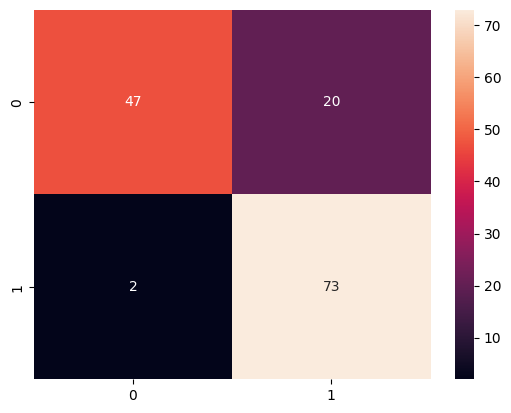

In [ ]:
H_map_Cm_NB=sns.heatmap(cm_NB,annot=True)

**This is done by SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)
y_pred_SVM = svm.predict(x_test)

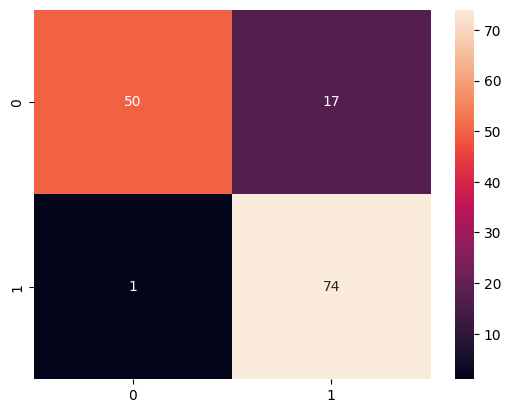

In [ ]:
cm_SVM=confusion_matrix(y_test,y_pred_SVM)
cm_SVM
H_map_Cm_SVM=sns.heatmap(cm_SVM,annot=True)

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print('Accuracy:', accuracy_SVM*100)

Accuracy: 87.32394366197182


**This is Done by Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred_tree = decision_tree.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_tree = accuracy_score(y_test, pred_tree)
print(accuracy_tree)

0.7464788732394366


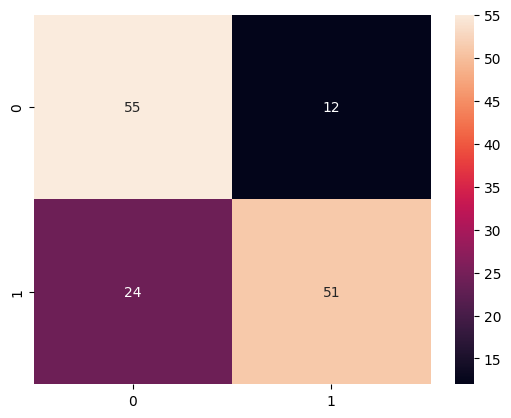

In [ ]:
cm_tree=confusion_matrix(y_test,pred_tree)
cm_tree
H_map_Cm_tree=sns.heatmap(cm_tree,annot=True)

** This is Done By Logistic Regression **

In [ ]:
# LR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
pred_LR = logistic_regression.predict(x_test)
accuracy_LR = accuracy_score(y_test, pred_LR)
print(accuracy_LR *100)

87.32394366197182


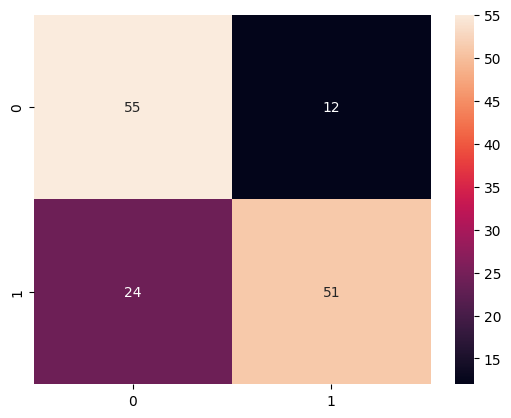

In [ ]:
cm_LR=confusion_matrix(y_test,pred_tree)
cm_LR
H_map_Cm_LR=sns.heatmap(cm_LR,annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
classifier.fit(x_train, y_train)
y_pred_RF = classifier.predict(x_test)
y_pred_RF = classifier.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(accuracy_RF *100)

88.02816901408451


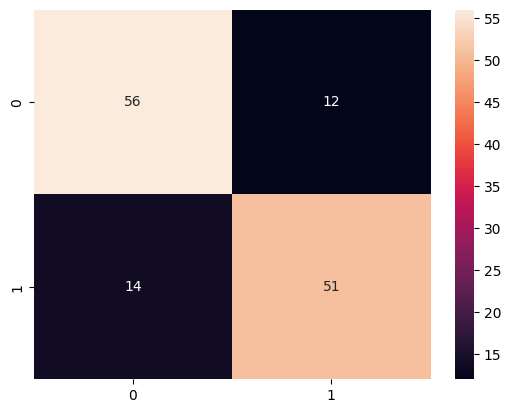

In [ ]:
RF_CM=confusion_matrix(y_test,y_pred_RF)
RF_CM
H_map_Cm_RF=sns.heatmap(cm_LR,annot=True)

This is the RNN neural network by Sequential()

In [ ]:
 #It is a classifier
cs=Sequential() 
cs.add(Dense(800,activation='relu',kernel_initializer ='random_normal' , input_dim=x_test.shape[1]))
cs.add(Dense(200,activation='relu',kernel_initializer ='random_normal' ))
cs.add(Dense(4,activation='relu',kernel_initializer ='random_normal' ))
cs.add(Dense(1,activation='sigmoid',kernel_initializer ='random_normal' ))
cs.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# cs.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=50)
cs.fit(x_train,y_train,batch_size=20,epochs=50,verbose=0)
eval_model=cs.evaluate(x_train,y_train)
eval_model

18/18 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.9043


[0.34639233350753784, 0.9042553305625916]

In [ ]:
y_pred_NRT=cs.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
accuracy_NRT=eval_model[1]
accuracy_NRT

0.9042553305625916

In [ ]:
y_pred_NRT=(y_pred_NRT>0.52)

In [ ]:
cm=confusion_matrix(y_test,y_pred_NRT)
cm

array([[51, 16],
       [ 4, 71]])

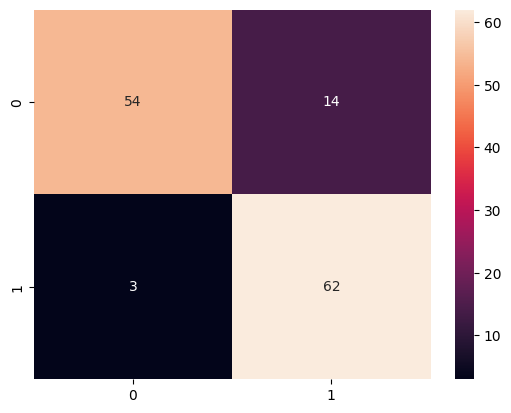

In [ ]:
H_map_Cm=sns.heatmap(cm,annot=True)

In [ ]:
val=pd.DataFrame(y_pred_NRT,columns=['Loan_Status'])
val=val.replace({True:"approved",False:"not approved"})
val

,Loan_Status
0,approved
1,not approved
2,approved
3,approved
4,approved
...,...
137,approved
138,approved
139,approved
140,not approved


In [ ]:
accuracy={
          "Naive_bayes ": accuracy_NB *100,
          "SVM":accuracy_SVM*100,
          "Decision Tree":accuracy_tree*100 ,
          "Logistic Regression":accuracy_LR*100,
          "Neural Network":accuracy_NRT*100
}
accuracy

{'Naive_bayes ': 84.50704225352112,
 'SVM': 87.32394366197182,
 'Decision Tree': 74.64788732394366,
 'Logistic Regression': 87.32394366197182,
 'Neural Network': 90.42553305625916}

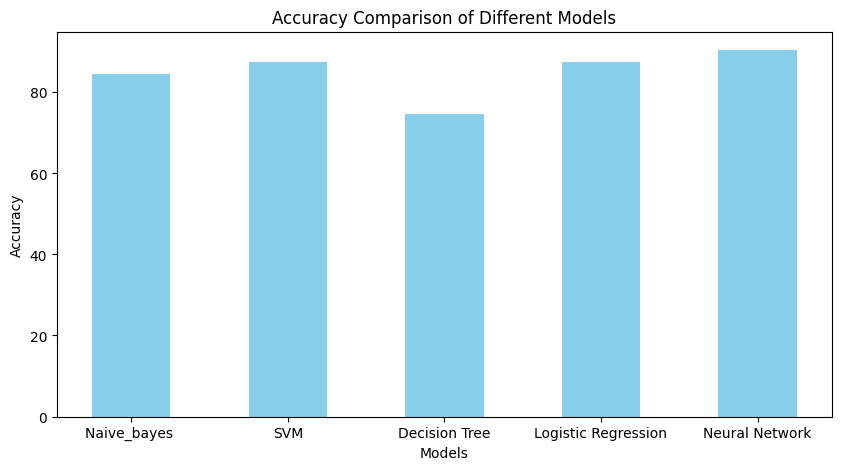

In [ ]:
Models = list(accuracy.keys())
acc = list(accuracy.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Models, acc, color ='skyblue',width = 0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()